# Assignment 3
# Regression and clustering exercises

## Deadline: Thursday, October 26 at 8:00 PM
## The assignment must be submitted in the form of a Jupyter notebook and uploaded to eClass.

## Marks:
- Part 1. Regression. 5 marks.
- Part 2. Clustering. 5 marks.
- Total = 10 marks.

## Notes:
Some partial code is provided; your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs without errors. All required imports will be provided for you; you shouldn't import any other modules. You may need to check with the documentation for Python or Scikit-Learn, or other online sources. There are multiple solutions for most tasks.

In [1]:
# Imports
import requests
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy.stats import norm

In [2]:
# This code will download the required data files from GitHub
def download_data(source, dest):
    base_url = 'https://raw.githubusercontent.com/'
    owner = 'MaralAminpour'
    repo = 'ML-BME-Course-UofA-Fall-2023'
    branch = 'main'
    url = '{}/{}/{}/{}/{}'.format(base_url, owner, repo, branch, source)
    r = requests.get(url)
    f = open(dest, 'wb')
    f.write(r.content)
    f.close()

# Create the temp directory, if it doesn't already exist
import os
if not os.path.exists('temp'):
   os.makedirs('temp')

download_data('Assignments/data/GA-brain-volumes-1-feature.csv', 'temp/GA-brain-volumes-1-feature.csv')
download_data('Assignments/data/GA-brain-volumes-6-features.csv', 'temp/GA-brain-volumes-6-features.csv')
download_data('Assignments/data/GA-brain-volumes-86-features.csv', 'temp/GA-brain-volumes-86-features.csv')
download_data('Assignments/data/slice.p', 'temp/slice.p')

## Part 1. Regression
## Compare the performance of linear regression models with different numbers of features 

In Part 1 of the assignment we will compare performance of multivariate linear regression models with different numbers of features to predidict age of a baby.

First we will now load the three datasets (1-feature, 6-feature and 86-feature) and print out number of features. Run the code in the next two cells.

In [3]:
# This function will create and return the feature matrix X and the target vector y
def CreateFeaturesTargets(filename):
    
    df = pd.read_csv(filename, header=None)
    
    # Convert from 'DataFrame' to numpy array
    data = df.values

    # Features are in columns one to end
    X = data[:, 1:]
    
    # Scale features
    X = StandardScaler().fit_transform(X)

    # Labels are in the column zero
    y = data[:, 0]

    # Return Features and Labels
    return X, y

In [4]:
# Load the datasets. Target values y are the same for all datasets
X1, y = CreateFeaturesTargets('temp/GA-brain-volumes-1-feature.csv')
print('Number of features in X1 is', X1.shape[1])

X6, y = CreateFeaturesTargets('temp/GA-brain-volumes-6-features.csv')
print('Number of features in X6 is', X6.shape[1])

X86, y = CreateFeaturesTargets('temp/GA-brain-volumes-86-features.csv')
print('Number of features in X86 is', X86.shape[1])

Number of features in X1 is 1
Number of features in X6 is 6
Number of features in X86 is 86


We will use this RMSE function. First, run the next code cell to define the function.

In [5]:
def RMSE(model,X,y):
    model.fit(X,y)
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print('RMSE: {} weeks'.format(round(rmse, 2)))
    return rmse

In the next step we will create a linear regression model and calculate RMSE on the whole set. Use the function `RMSE` that we have created above.

**Complete the code in the following cell to create a LinearRegression model object. Use the RMSE function to calculate and print the RMSE for each of the three datasets.**

In [6]:
# Select the model
# model = None

# Single feature
print('Single feature:')
# rmse1 = None

# 6 features
print('Six features:')
# rmse6 = None

# 86 features
print('86 features:')
# rmse86 = None

Single feature:
Six features:
86 features:


**Question 1:** What happens with RMSE on the whole set as we increase the number of features? Can you interpret this behaviour?

**Answer:** **Provide the text for your answer to Question 1 by editing this markdown cell.**

We will use the RMSE_CV function. First, run the next code cell to define the function.

In [7]:
def RMSE_CV(model,X,y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_cv = np.sqrt(-np.mean(scores))
    print('RMSE_CV: {} weeks'.format(round(rmse_cv,2)))
    return rmse_cv

Now let's calculate the cross-validated RMSE for the three different feature matrices.

**Complete the code in the following cell. Use the RMSE_CV function tgat we created above to calculate and print the RMSE_CV for each of the three datasets.**

In [8]:
# Single feature
print('Single feature:')
# rmse_cv1 = None

# 6 features
print('Six features:')
# rmse_cv6 = None

# 86 features
print('86 features:')
# rmse_cv86 = None

Single feature:
Six features:
86 features:


**Question 2:** Which model performs the best? Which model is overfitted? 

**Answer:** **Provide the text for your answer to Question 2 by editing this markdown cell.**

## Part 2. Clustering

### Explore Gaussian Mixture model

In Part 2 of the assignment we will explore the theoretical concepts of Gaussian mixture models, including **likelihoods** and **posteriors**. We will re-use the `GaussianMixture` model that we fitted to perform segmentation of brain MRI in Notebook 5.2.

First, run the following two code blocks to load the data and then to create a GaussianMixture model.

In [9]:
# Load the MRI image data from a pickle file
mri_slice = pickle.load(open('temp/slice.p', 'rb'))

# Find indices of non-zero elements
ind = np.where(mri_slice > 0)

# Select non-zero elements
slice2 = mri_slice[ind]

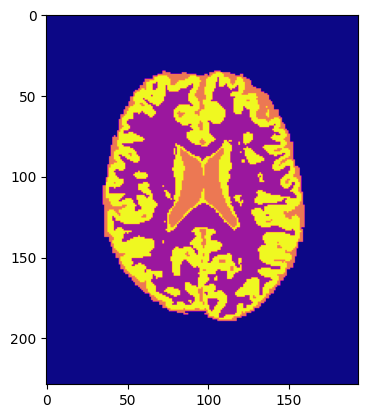

In [10]:
from sklearn.mixture import GaussianMixture

# Create the GaussianMixture model
model = GaussianMixture(n_components=3, random_state=42)

# Create the feature matrix X by reshaping slice2 into 2D array
X = slice2.reshape(-1, 1)

# Fit the model and predict the cluster labels
y_pred = model.fit_predict(X)

# Create array of 2D labels:
# Reshape the predicted labels to the original shape of mri_slice
labels2D = np.zeros(mri_slice.shape)
# Put the labels into fields with non-zero indices
labels2D[ind] = y_pred + 1

# Display the label image
plt.imshow(labels2D)
plt.set_cmap('plasma')

### Posterior probabilities

Probabilistic segmentation $p_{ik}$ gives us probability that pixel $i$ to belong the class $k$. These are in fact **posterior probabilities** $$p(z_i=k|x_i, \mu_k, \sigma_k,c_k)$$ for the labels $z_i$ given the intensity value $x_i$ and parameters $\mu_k, \sigma_k,c_k$ of the Gaussian intensity distribution for class $k$.

**Task 2.1:** Now let's plot how posterior probability for each class varies with pixel intensity value.

**Fill in the missing code below to display the probability curves. You will need to uncomment some lines.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


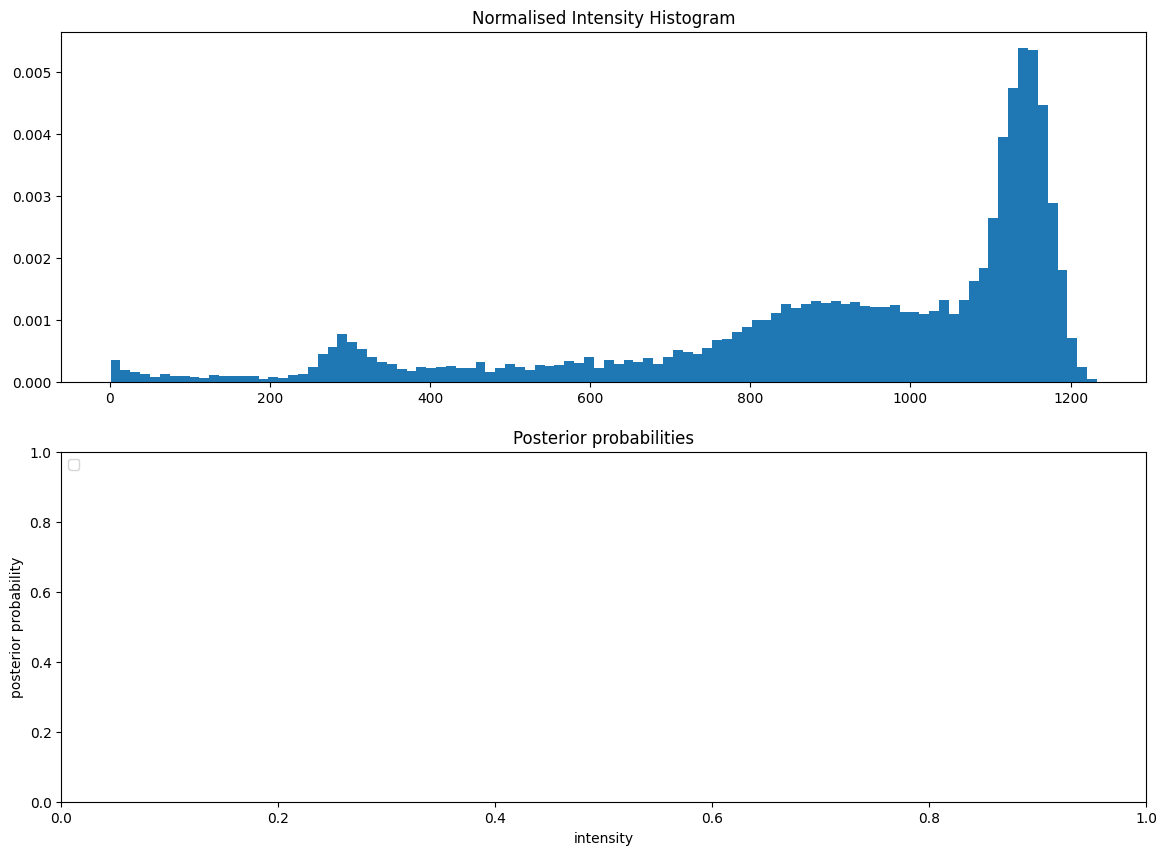

In [11]:
# Pixel intensity value range
intensity_range = np.linspace(0, np.max(slice2), 200)

# Predict posterior probabilities for the intensity range
# (Do not forget to reshape the intensity range to 2D array for the prediction!)
proba_curves = None

# Display
plt.figure(figsize = [14, 10])

# Plot normalised histogram
# The normalisation is achieved by parameter density
plt.subplot(211)
plt.hist(slice2, bins=100, density=True)
plt.title('Normalised Intensity Histogram')

# Plot posterior probabilities in a for loop
plt.subplot(212)
# for i in range(0,3):
#     plt.plot(None, None, linewidth=3, label='Class {}'.format(i))

# Annotate the subplot
plt.title('Posterior probabilities')
plt.xlabel('intensity')
plt.ylabel('posterior probability')
plt.legend(loc='upper left')
plt.show()

### Class-dependent likelihood

Class-dependent likelihoods are modelled by Gaussian distributions scaled by the mixing proportions
$$p(x_i|z_i=k,\mu_k,\sigma_k, c_k)=G(x_i,\mu_k,\sigma_k)c_k$$ 

To display these distributions over the normalised histogram (notice parameter `density=True`) we need to extract the `means_`, `covariances_` and `weights_` from the fitted `model`. Then we need to calculate the Gaussian distributions for these parameters. To do that we use function `norm.pdf` from `scipy.stats` module. Finally, these distributions need to be multiplied by the weights and plotted.

**Task 2.2:** Plot the Gaussian intensity distributions for each class $k$ over the normalised image histogram. 

**To do that, fill in the missing code below and run the cell. You will need to uncomment some lines.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


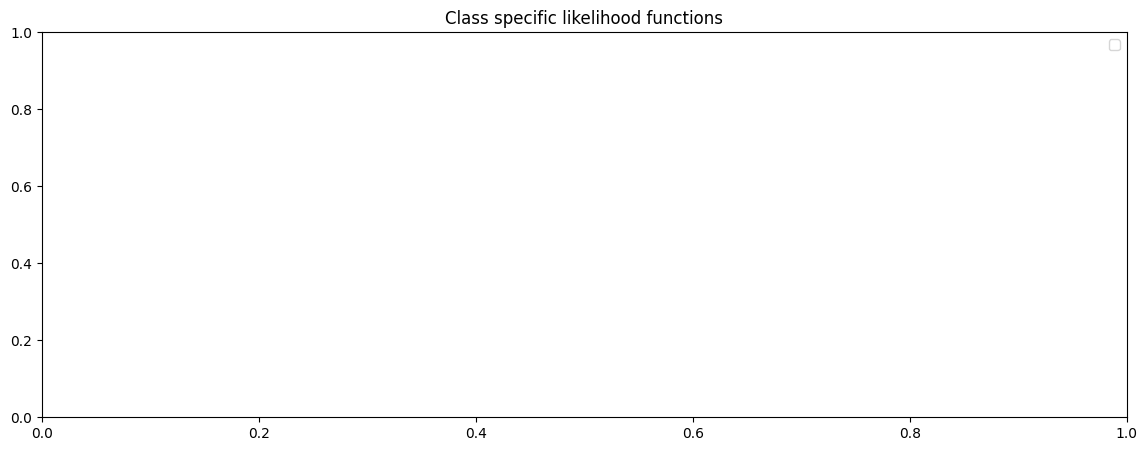

In [12]:
# To calculate gaussian distribution use the norm.pdf function

# Get parameters of GMM:
# Means
m = None  # Use flatten to make 1D arrays

# Standard deviation
s = None

# Mixing proportions
w = None

# Display
plt.figure(figsize = [14,5])

# Histogram
# plt.hist(None, bins=100, None)

# Class-dependent likelihoods - Gaussian PDFs
for i in range(0,3):
    likelihood = None
    # plt.plot(intensity_range, likelihood, linewidth=3, label='Class {}'.format(i))
plt.legend()
plt.title('Class specific likelihood functions')
plt.show()

### Likelihood

The likelihood for each pixel intensity $x_i$ given the Gaussian Mixture Model parameters $\phi = (\mu_k,\sigma_k,c_k),k=1,...,K$ can be evaluated as
$$p(x_i|\phi)=\sum_{k=1}^KG(x_i,\mu_k,\sigma_k)c_k $$

We can calculate this function by adding the class-dependent likelihoods together. The alternative is to use a function provided by `GaussianMixture` model `score_samples` that returns **log-likelihood**.

**Task 2.3:** Plot the likelihood function for the whole intensity range over the normalised image histogram. 

**To do that, first evaluate log-likelihood over the intensity range, then calculate the exponential using `np.exp` and then plot it. You will need to uncomment some lines.**

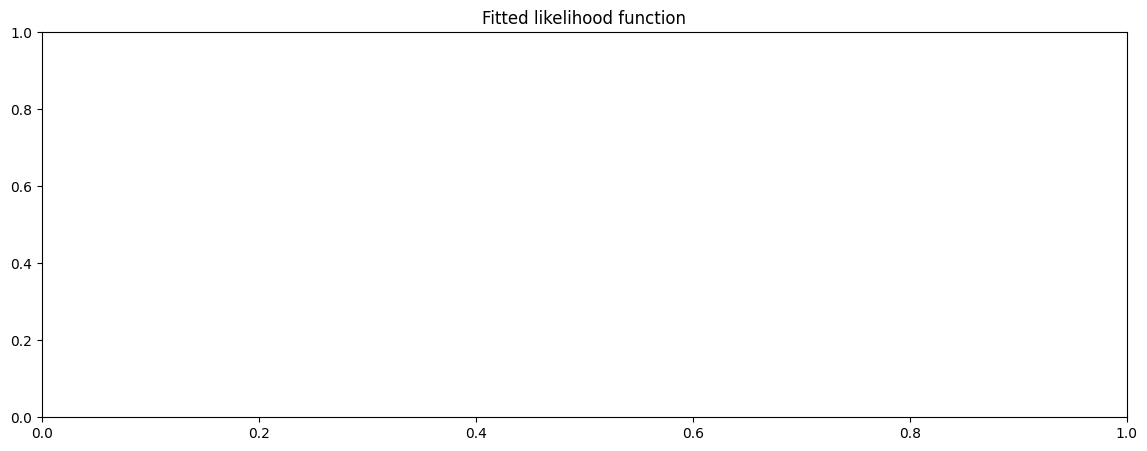

In [13]:
# Compare histogram with fitted Gaussian mixture likelihood function
plt.figure(figsize=[14, 5])

# Histogram
# plt.hist(None, None, None)

# Calculate likelihood
likelihood = np.exp(model.score_samples(intensity_range.reshape(-1, 1)))

# Plot likelihood
# plt.plot(intensity_range, None, linewidth=3, c='k')
plt.title('Fitted likelihood function')
plt.show()